In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import ggplot

In [ ]:
data=pd.read_csv('titanicc.csv')

In [ ]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
data.replace('?',np.nan,inplace=True)

In [ ]:
data.shape

(891, 15)

In [ ]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [ ]:
#boxplot


<Axes: >

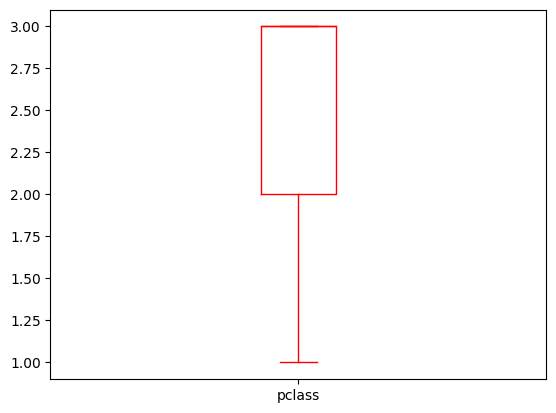

In [ ]:
data.boxplot(column=['pclass'],grid=False,color='red')

<Axes: >

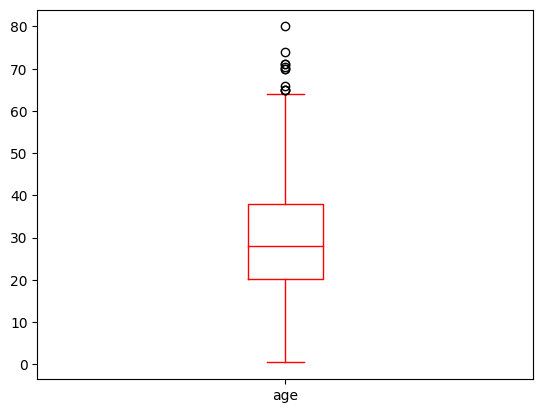

In [ ]:
data.boxplot(column=['age'],grid=False,color='red')

<Axes: >

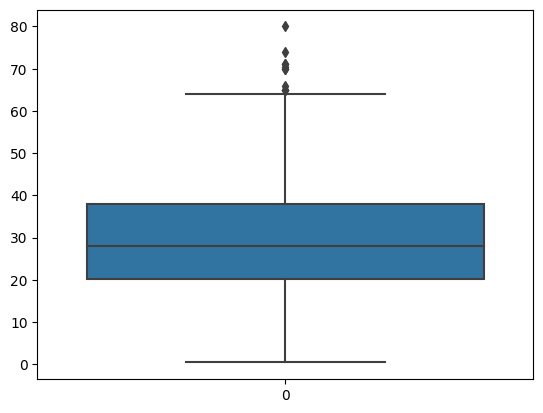

In [ ]:
sns.boxplot(data.age)

<Axes: xlabel='survived', ylabel='Count'>

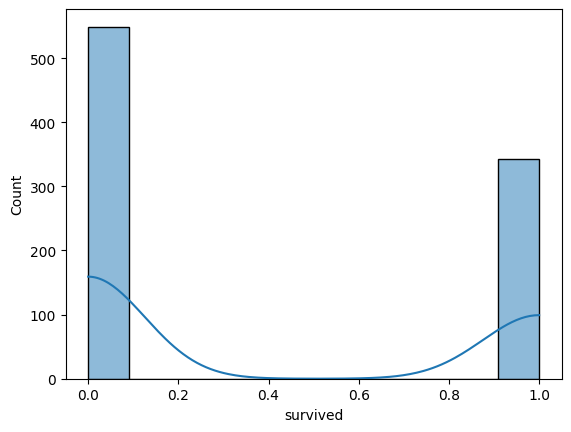

In [ ]:
sns.histplot(data.survived,kde=True)

<Axes: xlabel='embark_town', ylabel='Count'>

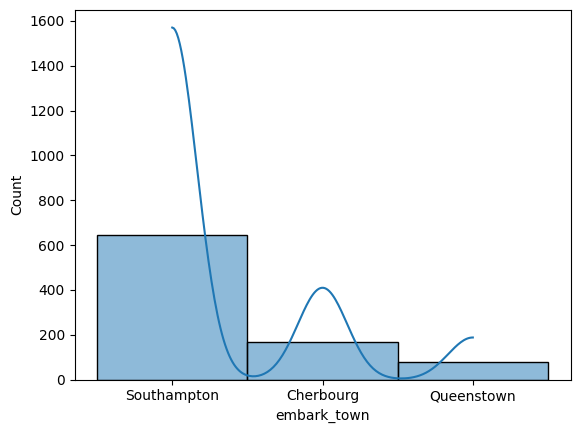

In [ ]:
sns.histplot(data.embark_town,kde=True)

<Axes: xlabel='fare', ylabel='Density'>

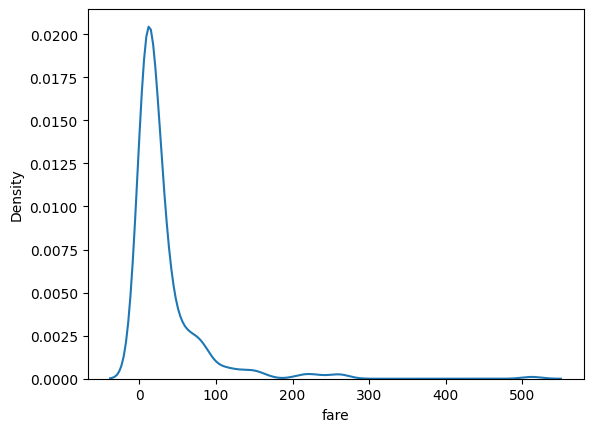

In [ ]:
sns.kdeplot(data['fare'])

In [ ]:
#Scatter plot

Text(0, 0.5, 'Gender')

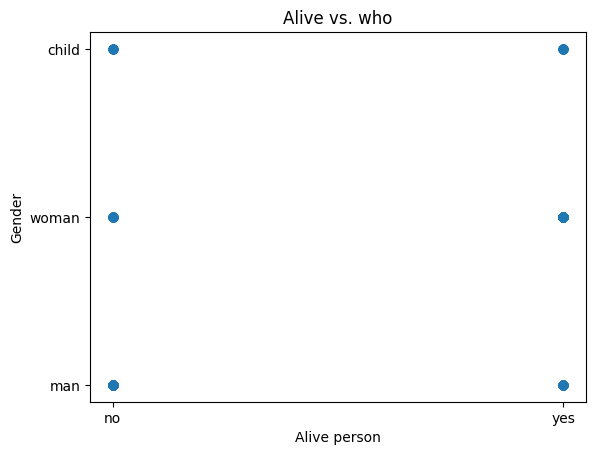

In [ ]:
plt.scatter(data.alive,data.who)
plt.title('Alive vs. who')
plt.xlabel('Alive person')
plt.ylabel('Gender')

Text(0, 0.5, 'age of the person')

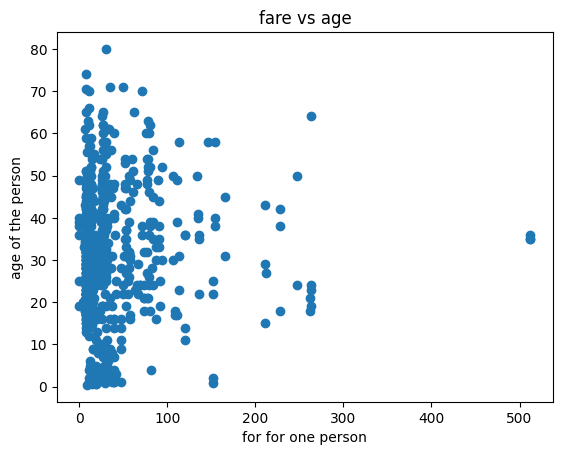

In [ ]:
plt.scatter(data.fare,data.age)
plt.title('fare vs age')
plt.xlabel('for for one person')
plt.ylabel('age of the person')

Text(0, 0.5, 'sex of the person')

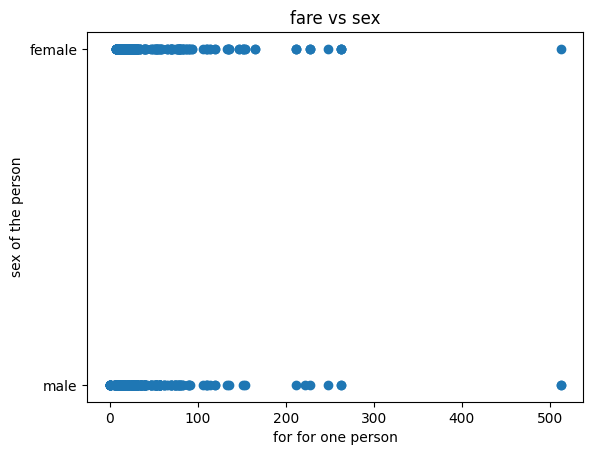

In [ ]:
plt.scatter(data.fare,data.sex)
plt.title('fare vs sex')
plt.xlabel('for for one person')
plt.ylabel('sex of the person')

In [ ]:
#Correlation

In [ ]:
data.corr()

<ipython-input-144-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [ ]:
import statsmodels.api as sm

In [ ]:
y=data['fare']
x=data[['pclass']]
x=sm.add_constant(x)
model=sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   fare   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     384.5
Date:                Sun, 28 May 2023   Prob (F-statistic):           1.97e-71
Time:                        13:42:04   Log-Likelihood:                -4583.8
No. Observations:                 891   AIC:                             9172.
Df Residuals:                     889   BIC:                             9181.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        107.6057      4.089     26.315      0.0

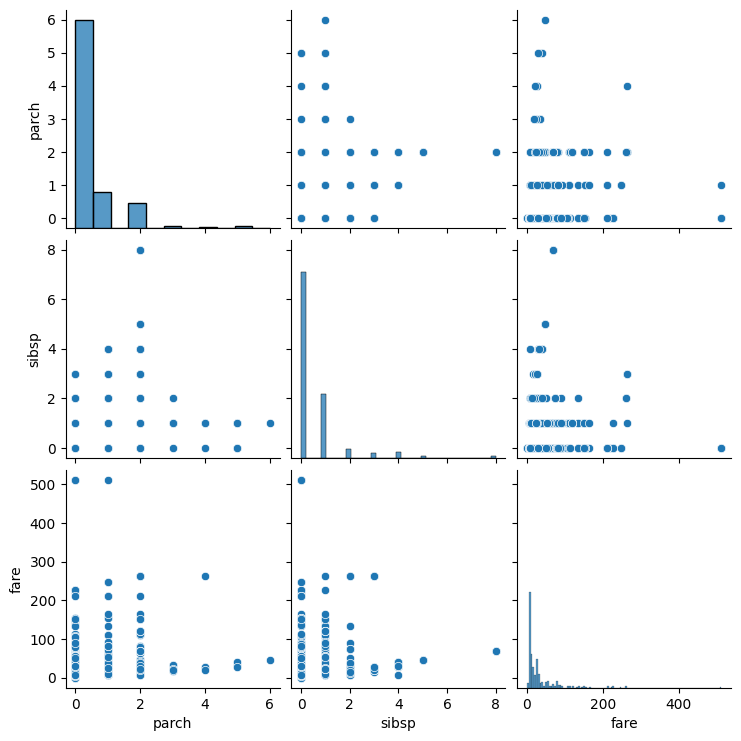

In [ ]:
sns.pairplot(data=data[['parch','sibsp','fare']])

In [ ]:
stats=data.describe(include='all')
print(stats)

          survived      pclass   sex         age       sibsp       parch  \
count   891.000000  891.000000   891  714.000000  891.000000  891.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         NaN   
freq           NaN         NaN   577         NaN         NaN         NaN   
mean      0.383838    2.308642   NaN   29.699118    0.523008    0.381594   
std       0.486592    0.836071   NaN   14.526497    1.102743    0.806057   
min       0.000000    1.000000   NaN    0.420000    0.000000    0.000000   
25%       0.000000    2.000000   NaN   20.125000    0.000000    0.000000   
50%       0.000000    3.000000   NaN   28.000000    0.000000    0.000000   
75%       1.000000    3.000000   NaN   38.000000    1.000000    0.000000   
max       1.000000    3.000000   NaN   80.000000    8.000000    6.000000   

              fare embarked  class  who adult_male deck  embark_town alive  \
count   8

In [ ]:
data.mean()

<ipython-input-149-abc01cf6c622>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.


survived       0.383838
pclass         2.308642
age           29.699118
sibsp          0.523008
parch          0.381594
fare          32.204208
adult_male     0.602694
alone          0.602694
dtype: float64

In [ ]:
data.median()

<ipython-input-150-135339ac59ce>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.


survived       0.0000
pclass         3.0000
age           28.0000
sibsp          0.0000
parch          0.0000
fare          14.4542
adult_male     1.0000
alone          1.0000
dtype: float64

In [ ]:
data.max()

<ipython-input-151-8637789457d2>:1: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.


survived             1
pclass               3
sex               male
age               80.0
sibsp                8
parch                6
fare          512.3292
class            Third
who              woman
adult_male        True
alive              yes
alone             True
dtype: object

In [ ]:
data.std()

<ipython-input-152-a47ac8255c06>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.


survived       0.486592
pclass         0.836071
age           14.526497
sibsp          1.102743
parch          0.806057
fare          49.693429
adult_male     0.489615
alone          0.489615
dtype: float64

In [ ]:
#Handle the missing values

In [ ]:
data.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
pd.isnull(data["deck"])

0       True
1      False
2       True
3      False
4       True
       ...  
886     True
887    False
888     True
889    False
890     True
Name: deck, Length: 891, dtype: bool

In [ ]:
data['age'].fillna(data['age'].mean(),inplace=True)

In [ ]:
#Find outliers and replace the outliers

In [ ]:
from scipy import stats
import numpy as np
s=np.abs(stats.zscore(data['fare']))
print(s)

0      0.502445
1      0.786845
2      0.488854
3      0.420730
4      0.486337
         ...   
886    0.386671
887    0.044381
888    0.176263
889    0.044381
890    0.492378
Name: fare, Length: 891, dtype: float64


In [ ]:
threshold=2
print(np.where(s>2))

(array([ 27,  31,  88, 118, 195, 258, 268, 269, 297, 299, 305, 311, 318,
       319, 325, 332, 334, 337, 341, 373, 377, 380, 438, 498, 527, 557,
       609, 660, 679, 689, 700, 708, 716, 730, 737, 742, 779, 856]),)


In [ ]:
Q1=np.percentile(data['fare'],25,method='midpoint')
Q3=np.percentile(data['fare'],75,method='midpoint')
IQR=Q3 - Q1
print(IQR)

23.0896


In [ ]:
upper=Q3+1.5*IQR
upper_array=np.array(data['fare']>=upper)
print("upper bound",upper)
print(upper_array.sum())

lower=Q1-1.5*IQR
lower_array=np.array(data['fare']<=lower)
print("lower bound",lower)
print(lower_array.sum())

upper bound 65.6344
116
lower bound -26.724
0


In [ ]:
#Removing the outliers

In [ ]:
print("old shapes ",data.shape)
Q1=data['fare'].quantile(0.25)
Q3=data['fare'].quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR

upper_array=np.where(data['fare']>=upper)[0]
lower_array=np.where(data['fare']<=lower)[0]

data['fare'].drop(index=upper_array,inplace=True)
data['fare'].drop(index=lower_array,inplace=True)

print("new shape ",data['fare'].shape)



old shapes  (891, 15)
new shape  (891,)


In [ ]:
median=data.loc[data['fare']<13,'fare'].median()
data.loc[data.fare>13,'fare']=np.nan
data.fillna(median,inplace=True)

In [ ]:
#Check for categorical columns and perform encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data.sex=le.fit_transform(data.sex)



In [ ]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,7.8958,Southampton,no,False
1,1,1,0,38.0,1,0,7.8958,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,7.8958,Southampton,yes,True
3,1,1,0,35.0,1,0,7.8958,S,First,woman,False,C,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,7.8958,Southampton,no,True


In [ ]:
data.who=le.fit_transform(data.who)

In [ ]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,1,True,7.8958,Southampton,no,False
1,1,1,0,38.0,1,0,7.8958,C,First,2,False,C,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,S,Third,2,False,7.8958,Southampton,yes,True
3,1,1,0,35.0,1,0,7.8958,S,First,2,False,C,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,S,Third,1,True,7.8958,Southampton,no,True


In [ ]:
data_main=pd.get_dummies(data,columns=['embark_town'])

In [ ]:
data_main.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,alive,alone,embark_town_7.8958,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,3,1,22.0,1,0,7.2500,S,Third,1,True,7.8958,no,False,0,0,0,1
1,1,1,0,38.0,1,0,7.8958,C,First,2,False,C,yes,False,0,1,0,0
2,1,3,0,26.0,0,0,7.9250,S,Third,2,False,7.8958,yes,True,0,0,0,1
3,1,1,0,35.0,1,0,7.8958,S,First,2,False,C,yes,False,0,0,0,1
4,0,3,1,35.0,0,0,8.0500,S,Third,1,True,7.8958,no,True,0,0,0,1


In [ ]:
data_main.corr()

<ipython-input-168-63ebd167fcb1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,alone,embark_town_7.8958,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.079069,0.325753,-0.557080,-0.203367,0.060095,0.168240,0.003650,-0.155660
pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.018196,-0.196793,0.094035,0.135207,-0.074282,-0.243292,0.221009,0.081720
sex,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.090763,-0.639773,0.908578,0.303646,-0.064296,-0.082853,-0.074115,0.125722
age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,-0.019800,0.354507,0.253236,0.179775,0.074099,0.032024,-0.013855,-0.027121
sibsp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,-0.059900,-0.136003,-0.253586,-0.584471,-0.022508,-0.059528,-0.026354,0.070941
parch,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,-0.039006,-0.055682,-0.349943,-0.583398,-0.022467,-0.011069,-0.081228,0.063036
fare,0.079069,-0.018196,-0.090763,-0.019800,-0.059900,-0.039006,1.000000,0.062412,-0.088546,0.063849,-0.007647,-0.086679,-0.041234,0.102436
who,0.325753,-0.196793,-0.639773,0.354507,-0.136003,-0.055682,0.062412,1.000000,-0.437532,0.006540,0.063007,0.031652,0.092488,-0.092377
adult_male,-0.557080,0.094035,0.908578,0.253236,-0.253586,-0.349943,-0.088546,-0.437532,1.000000,0.404744,-0.058418,-0.065980,-0.076789,0.112035
alone,-0.203367,0.135207,0.303646,0.179775,-0.584471,-0.583398,0.063849,0.006540,0.404744,1.000000,0.038510,-0.095298,0.086464,0.024929


In [ ]:
#HeatMap

<ipython-input-182-ef474eb13fc0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


<Axes: >

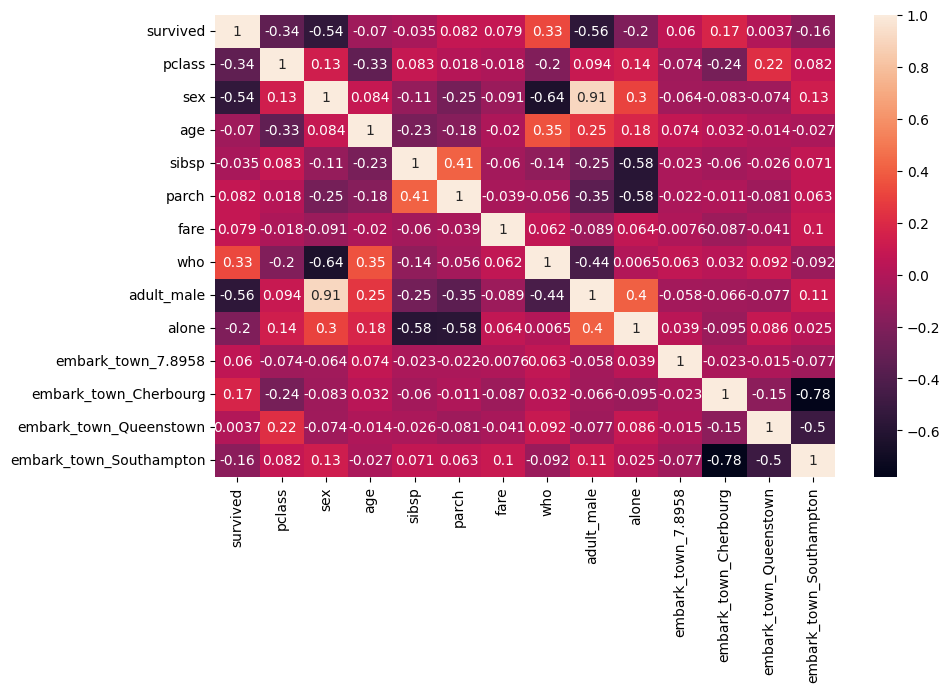

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data_main.corr(),annot=True)

In [ ]:
y=data_main['fare']
y.head()

0    7.2500
1    7.8958
2    7.9250
3    7.8958
4    8.0500
Name: fare, dtype: float64

In [ ]:
X=data_main.drop(columns=['fare'],axis=1)
X.head()

,survived,pclass,sex,age,sibsp,parch,embarked,class,who,adult_male,deck,alive,alone,embark_town_7.8958,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,3,1,22.0,1,0,S,Third,1,True,7.8958,no,False,0,0,0,1
1,1,1,0,38.0,1,0,C,First,2,False,C,yes,False,0,1,0,0
2,1,3,0,26.0,0,0,S,Third,2,False,7.8958,yes,True,0,0,0,1
3,1,1,0,35.0,1,0,S,First,2,False,C,yes,False,0,0,0,1
4,0,3,1,35.0,0,0,S,Third,1,True,7.8958,no,True,0,0,0,1


In [ ]:
#Scale the independent variables

In [ ]:
name=X.columns
name

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked',
       'class', 'who', 'adult_male', 'deck', 'alive', 'alone',
       'embark_town_7.8958', 'embark_town_Cherbourg', 'embark_town_Queenstown',
       'embark_town_Southampton'],
      dtype='object')

In [ ]:
X=X.replace({'adult_male': {'yes': 1,'no':0}})
X

,survived,pclass,sex,age,sibsp,parch,embarked,class,who,adult_male,deck,alive,alone,embark_town_7.8958,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,3,1,22.000000,1,0,S,Third,1,True,7.8958,no,False,0,0,0,1
1,1,1,0,38.000000,1,0,C,First,2,False,C,yes,False,0,1,0,0
2,1,3,0,26.000000,0,0,S,Third,2,False,7.8958,yes,True,0,0,0,1
3,1,1,0,35.000000,1,0,S,First,2,False,C,yes,False,0,0,0,1
4,0,3,1,35.000000,0,0,S,Third,1,True,7.8958,no,True,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,S,Second,1,True,7.8958,no,True,0,0,0,1
887,1,1,0,19.000000,0,0,S,First,2,False,B,yes,True,0,0,0,1
888,0,3,0,29.699118,1,2,S,Third,2,False,7.8958,no,False,0,0,0,1
889,1,1,1,26.000000,0,0,C,First,1,True,C,yes,True,0,1,0,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()

In [ ]:
X_scaled=scale.fit_tranform(X)
x_scaled

In [ ]:
X=pd.DataFrame(X_scaled,columns=name)
X

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train.head()

,survived,pclass,sex,age,sibsp,parch,embarked,class,who,adult_male,deck,alive,alone,embark_town_7.8958,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
140,0,3,0,29.699118,0,2,C,Third,2,False,7.8958,no,False,0,1,0,0
439,0,2,1,31.000000,0,0,S,Second,1,True,7.8958,no,True,0,0,0,1
817,0,2,1,31.000000,1,1,C,Second,1,True,7.8958,no,False,0,1,0,0
378,0,3,1,20.000000,0,0,C,Third,1,True,7.8958,no,True,0,1,0,0
491,0,3,1,21.000000,0,0,S,Third,1,True,7.8958,no,True,0,0,0,1


In [ ]:
X_test.head()

,survived,pclass,sex,age,sibsp,parch,embarked,class,who,adult_male,deck,alive,alone,embark_town_7.8958,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
495,0,3,1,29.699118,0,0,C,Third,1,True,7.8958,no,True,0,1,0,0
648,0,3,1,29.699118,0,0,S,Third,1,True,7.8958,no,True,0,0,0,1
278,0,3,1,7.000000,4,1,Q,Third,0,False,7.8958,no,False,0,0,1,0
31,1,1,0,29.699118,1,0,C,First,2,False,B,yes,False,0,1,0,0
255,1,3,0,29.000000,0,2,C,Third,2,False,7.8958,yes,False,0,1,0,0


In [ ]:
y_train

140     7.8958
439    10.5000
817     7.8958
378     4.0125
491     7.2500
        ...   
835     7.8958
192     7.8542
629     7.7333
559     7.8958
684     7.8958
Name: fare, Length: 712, dtype: float64

In [ ]:
y_test

495    7.8958
648    7.5500
278    7.8958
31     7.8958
255    7.8958
        ...  
780    7.2292
837    8.0500
215    7.8958
833    7.8542
372    8.0500
Name: fare, Length: 179, dtype: float64